In [1]:
using DataFrames
using Distributions
using Plots
using Random

## Figuring out what distribution and paramaters to use; how to apply to events

### Binomial

100.87
[97, 92, 108, 95, 111, 112, 116, 109, 106, 102, 110, 108, 101, 102, 112, 102, 103, 115, 87, 99, 119, 106, 92, 105, 102, 91, 99, 107, 88, 113, 96, 112, 96, 101, 106, 119, 108, 93, 115, 89, 94, 112, 89, 99, 90, 98, 98, 77, 100, 91, 90, 106, 115, 110, 88, 106, 106, 97, 99, 106, 103, 89, 95, 102, 101, 84, 112, 107, 97, 79, 95, 90, 126, 107, 92, 92, 92, 82, 111, 116, 91, 109, 117, 99, 104, 94, 103, 93, 105, 110, 92, 85, 95, 82, 110, 105, 91, 114, 95, 106]


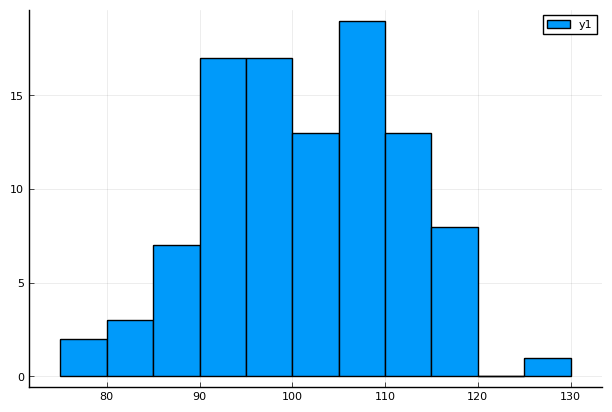

[3, 6, 3, 5, 2, 5, 2, 2, 8, 5, 4, 3, 3, 3, 1, 5, 2, 3, 4, 3, 2, 1, 2, 2, 3, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [2]:
dbin = Binomial(1000,0.1)
x = rand(dbin,100);
println(mean(x))
println(x)
pyplot()
histogram(x, bins=10)
gui()

# bin the data
histdata = [count(isequal(i),x) for i in unique(x)]
println(histdata)
# hh = hist(x,22);  # using PyPlot package
# println(hh[1])
# println(hh[2])


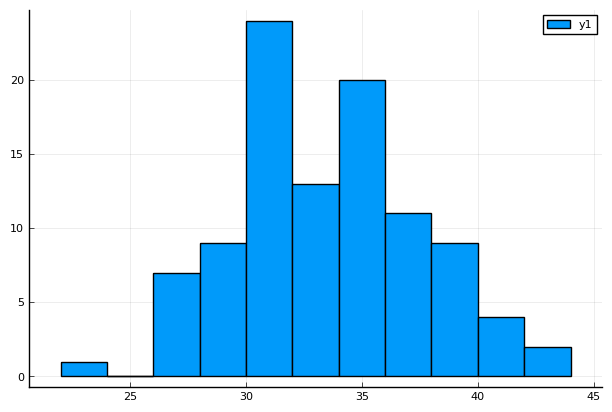

33.02


In [3]:
dhypergeo = Hypergeometric(100,200,100) # successes, failures, draws
x = rand(dhypergeo,100)
println(mean(x))
pyplot()
histogram(x,bins=10)
gui()

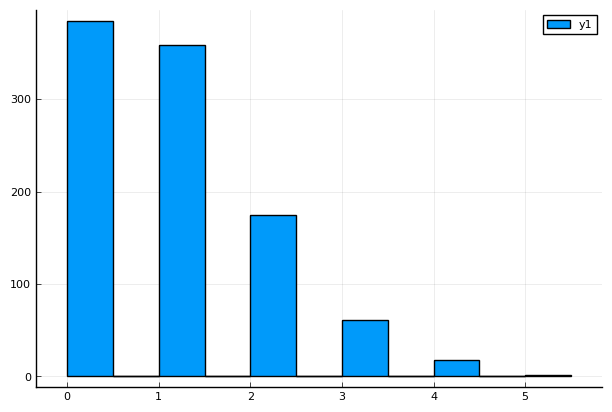

0.974


In [4]:
dpoiss = Poisson(1)
x = rand(dpoiss, 1000)
println(mean(x))
histogram(x)
gui()

### The long tail of (some) gamma distributions.

2.1946281272511454
219.0


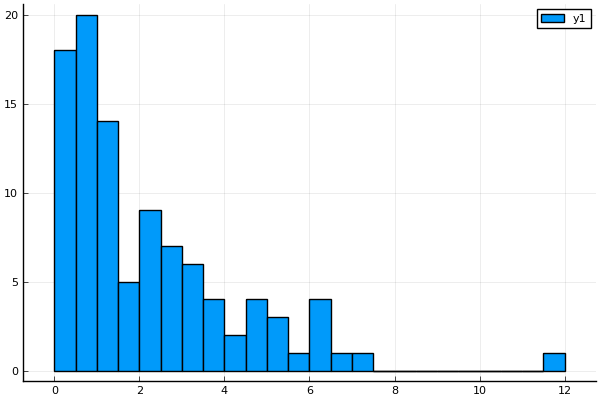

In [7]:
dgamma = Gamma(1.0, 2.0 )  #shape, scale
x = rand(dgamma,100);
println(mean(x))
println(round(sum((x))))
histogram(x, bins=22)
# hh = hist(x,20);  using PyPlot
# println(ceil(sum(hh[1] .* hh[2][2:end])))
# println(mean(dgamma) * 20)

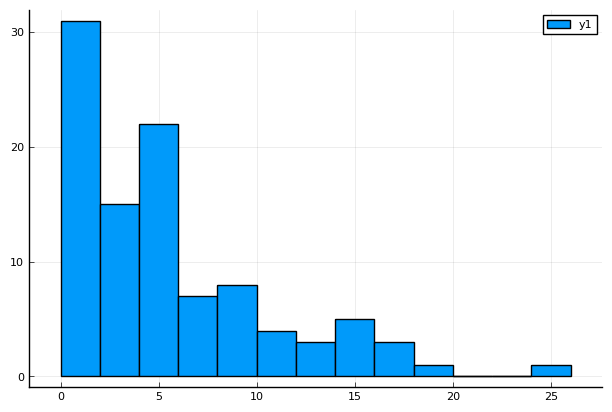

[5, 1, 5, 1, 15, 1, 4, 2, 11, 10, 1, 5, 5, 18, 0, 10, 6, 0, 0, 16, 10, 0, 4, 4, 2, 4, 2, 1, 5, 4, 6, 17, 3, 13, 1, 19, 2, 3, 7, 12, 6, 8, 8, 3, 10, 4, 16, 15, 0, 0, 7, 1, 26, 5, 5, 3, 8, 0, 9, 14, 1, 5, 1, 5, 1, 2, 2, 3, 0, 8, 7, 0, 10, 5, 1, 18, 6, 5, 0, 3, 1, 5, 4, 1, 4, 6, 2, 2, 4, 4, 10, 4, 10, 0, 8, 13, 1, 2, 12, 0]
6.0


In [8]:
derlang = Erlang(1,5)  # integer shape, scale
x = rand(derlang,100);
histogram(x,bins=22)
gui()
println(round.(Int,x))
println(round(mean(x)))


### Variations in Gamma Parameters

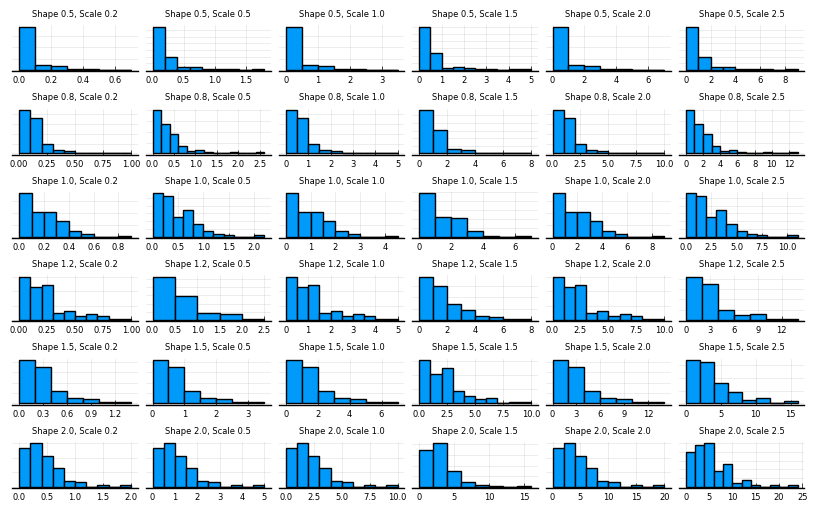

In [9]:
# multiple gamma distributions, varying parameters shape, scale
pyplot()
shapes = [0.5, 0.8, 1.0, 1.2, 1.5, 2.0]
scales = [0.2, 0.5, 1.0, 1.5, 2.0, 2.5]
p = Array{Any,2}(undef,6,6)
for (shi,sh) in enumerate(shapes)
    for (sci, sc) in enumerate(scales)
        Random.seed!(1)
        dgamma = Gamma(sh, sc)
        x = rand(dgamma,100)
        p[sci,shi] = histogram(x,bins=11,title="Shape $sh, Scale $sc", 
                               titlefontsize=6, size=(800,500))
    end
end
l = @layout([a1 a2 a3 a4 a5 a6; 
             b1 b2 b3 b4 b5 b6; 
             c1 c2 c3 c4 c5 c6; 
             d1 d2 d3 d4 d5 d6; 
             e1 e2 e3 e4 e5 e6; 
             f1 f2 f3 f4 f5 f6])
plot(p..., layout=l, legend=false, yaxis=false, tickfontsize=6)
gui()
        

### Variations in Erlang Parameters

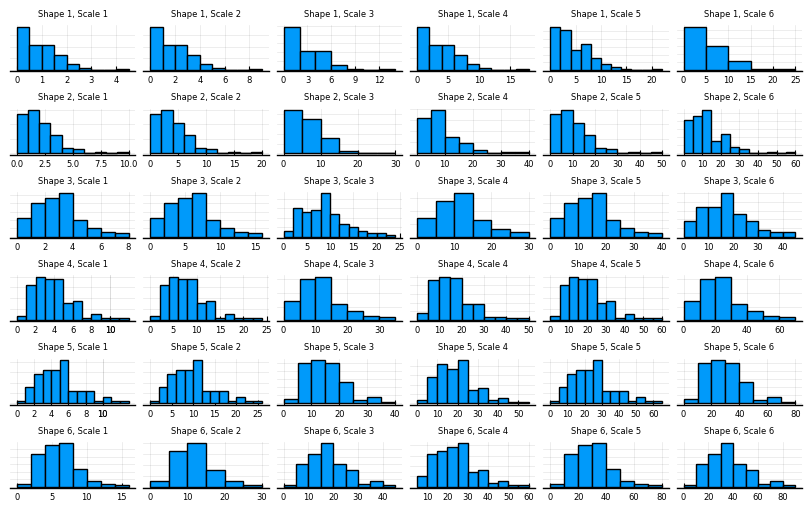

In [10]:
# multiple gamma distributions, varying parameters shape, scale
pyplot()
shapes = [1, 2, 3, 4, 5, 6]
scales = [1, 2, 3, 4, 5, 6]
p = Array{Any,2}(undef,6,6)
for (shi,sh) in enumerate(shapes)
    for (sci, sc) in enumerate(scales)
        Random.seed!(1)
        derlang = Erlang(sh, sc)
        x = rand(derlang,100)
        p[sci,shi] = histogram(x,bins=11,title="Shape $sh, Scale $sc", titlefontsize=6, size=(800,500))
    end
end
l = @layout([a1 a2 a3 a4 a5 a6; 
             b1 b2 b3 b4 b5 b6; 
             c1 c2 c3 c4 c5 c6; 
             d1 d2 d3 d4 d5 d6; 
             e1 e2 e3 e4 e5 e6; 
             f1 f2 f3 f4 f5 f6])
plot(p..., layout=l, legend=false, yaxis=false, tickfontsize=6)
gui()
        

#### The pdf is a static characteristic of the distribution
So it is always the same result.

In [23]:
dgamma = Gamma(1.2,1.6)
startpoint = 0.5
endpoint = 10
display(pdf.(dgamma,startpoint:endpoint))
println(sum(pdf.(dgamma,startpoint:endpoint)))

10-element Array{Float64,1}:
 0.3946485325457069
 0.2631483747149412
 0.15600423592798365
 0.08931572887489388
 0.050271609447026765
 0.0280103653386679
 0.015502254256767229
 0.008538673074193611
 0.004686276044009092
 0.002564807362881233

1.0126908575870714


In [41]:
dgamma = Gamma(0.5,1.0)
x = rand(0.1:0.1:1.5,6)
rand(dgamma,6)

6-element Array{Float64,1}:
 2.2991263607386405
 0.829541182354455
 1.4790393239051487
 0.5427670526691815
 0.9560187696562894
 1.0788196990701129

[3, 1, 3, 1, 3, 1, 3, 3, 4, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 4, 1, 1, 1, 4, 3, 4, 1, 1, 1, 3, 1, 1, 4, 1, 1, 3, 4, 1, 1, 1, 1, 3, 1, 3, 1, 1, 4, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 3, 3, 1, 4, 1, 1, 3, 3, 1, 1, 1]


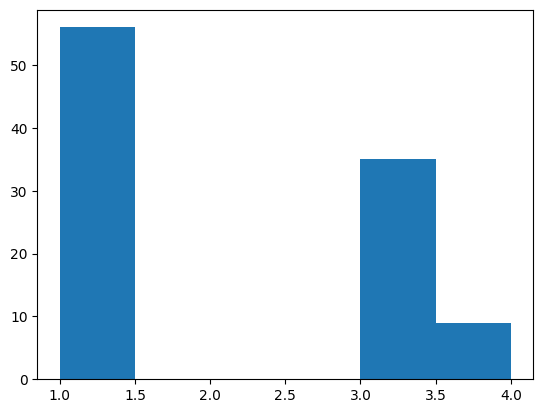

[56, 0, 35, 9, 0, 0]
[56.0, 0.0, 0.0, 0.0, 35.0, 9.0]
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [22]:
nilprobs = [.6, 0.0, .3, .1, 0.0, 0.0]

dcat = Categorical(nilprobs)
x = rand(dcat,100)
println(x)
println([count(x->x==i, x) for i in 1:6])
hh = hist(x,6);
println(hh[1])
println(hh[2])

## Categorical Distribution

### Here is the categorical distribution output with 3 classes (well, 6 with 3 having 0.0 probability) with 100 trials. Next, we will try with similar inputs using the multinomial probability distribution.

[0.5, 0.0, 0.375, 0.125, 0.0, 0.0]
[1, 1, 1, 1, 3, 4, 1, 3, 4, 1, 1, 3, 1, 1, 3, 4, 3, 4, 1, 1, 4, 3, 3, 3, 3, 3, 3, 1, 4, 3, 1, 4, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 4, 4, 3, 1, 3, 1, 3, 1, 3, 4, 1, 4, 3, 1, 4, 1, 1, 3, 1, 3, 3, 4, 1, 1, 3, 3, 1, 3, 1, 3, 1, 4, 1, 3, 4, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1]
[46, 0, 39, 15, 0, 0]


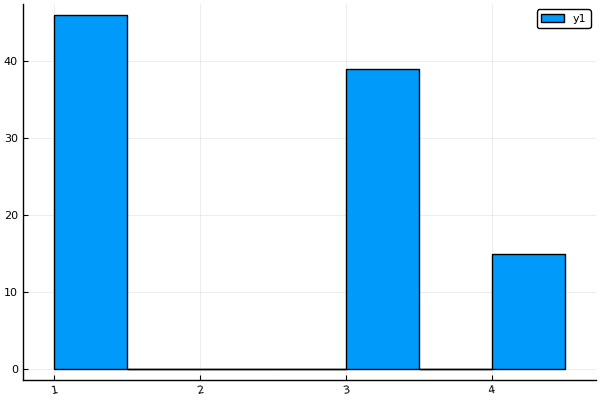

In [19]:
snorm(arr) = arr ./ (sum(arr))

age_amplify = Dict(1=>(1.3,.7), 2=>(1.1,.9), 3=>(1.0, 1.0), 4=>(0.9,1.1), 5=>(.8,1.2))
nilprobs = [.6, 0.0, .3, .1, 0.0, 0.0]
# do we amplify the probs or the outcomes?
# probs
nilprobs = snorm(nilprobs .* [0.8, 0.0, 1.2, 1.2, 0.0, 0.0])
# all this does is jiggle things in a way that doesn't have a lot of meaning--it changes the relative probs in 
# partially obvious way.  We need a reason that justifies the math.

probs = nilprobs
println(probs)

dcat = Categorical(probs)
x = rand(dcat,100)
vals = [count(x .== i) for i in 1:6]
# names = ("cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6")
# bar(names, vals);
println(x)
println(vals)
histogram(x,bins=10, xaxis=(lims=(1,10)))


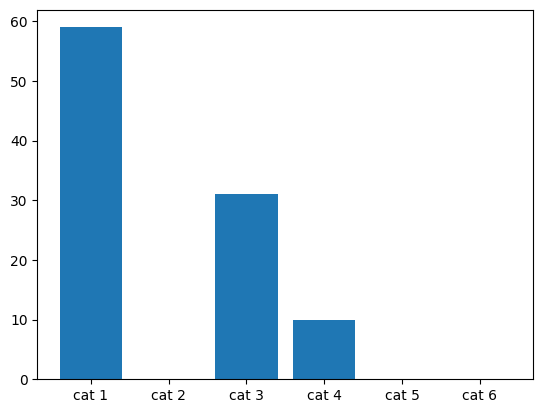

[59, 0, 31, 10, 0, 0]


In [65]:
# use the modified probs from the above to compare distribution plots
probs = [0.5, 0.0, 0.375, 0.125, 0.0, 0.0]
dmulti = Multinomial(100, probs)
names = ("cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6")
x = vec(rand(dmulti, 1))
println(x)
bar(names, x);
# xlim(0.0,6.0)

### Let's try this again with a simpler approach:

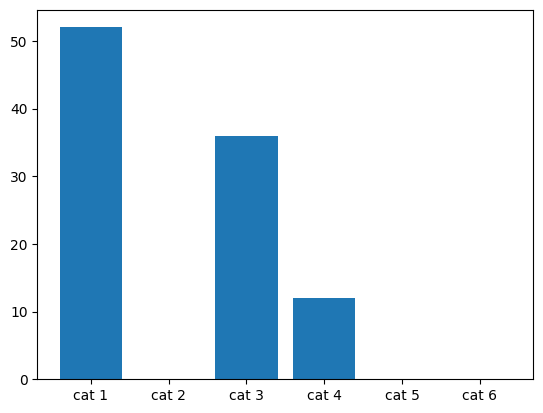

[0.0, 0.5, 0.5, 0.875, 1.0, 1.0, 1.0]
[52, 0, 36, 12, 0, 0]


In [22]:
probs = [0.5, 0.0, 0.375, 0.125, 0.0, 0.0]
cats = 6
boundaries = [0.0, probs[1], sum(probs[1:2]), sum(probs[1:3]), sum(probs[1:4]), sum(probs[1:5]), sum(probs[1:6])]
println(boundaries)
x = rand(100)
counts = [count(boundaries[i-1] .<= x .< boundaries[i]) for i in 2:7]
names = ("cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6")
println(counts)
bar(names, counts);

[51, 49, 54, 53, 54, 44, 51, 45, 47, 50, 41, 41, 41, 48, 49, 49, 53, 57, 52, 45, 47, 46, 46, 51, 50, 52, 53, 49, 48, 53, 48, 48, 47, 47, 47, 51, 48, 54, 49, 52, 54, 53, 49, 49, 36, 43, 48, 53, 51, 46, 52, 51, 50, 53, 44, 52, 45, 53, 55, 52, 49, 51, 49, 47, 53, 43, 48, 49, 57, 49, 42, 52, 59, 49, 47, 51, 59, 56, 45, 52, 48, 56, 46, 46, 51, 50, 43, 37, 45, 54, 55, 52, 51, 55, 41, 60, 56, 54, 44, 53]
[19, 20, 16, 7, 16, 20, 11, 14, 15, 11, 14, 13, 20, 13, 14, 14, 17, 15, 11, 19, 18, 13, 19, 8, 18, 19, 13, 9, 12, 14, 13, 17, 15, 14, 20, 14, 8, 19, 16, 18, 7, 14, 16, 13, 13, 12, 6, 20, 21, 13, 13, 10, 13, 19, 12, 7, 13, 7, 18, 22, 13, 19, 12, 18, 18, 15, 17, 18, 16, 17, 17, 12, 11, 22, 12, 17, 16, 16, 17, 23, 16, 13, 14, 10, 14, 12, 16, 18, 12, 20, 13, 20, 16, 20, 10, 15, 19, 18, 14, 15]
[8, 4, 8, 3, 4, 4, 1, 8, 7, 6, 11, 4, 7, 5, 4, 7, 6, 2, 5, 6, 6, 5, 9, 6, 7, 2, 7, 9, 2, 9, 8, 1, 8, 2, 10, 8, 0, 1, 5, 3, 2, 7, 8, 10, 7, 8, 6, 2, 3, 5, 5, 8, 7, 10, 3, 5, 7, 7, 4, 3, 2, 4, 11, 3, 2, 6, 1,

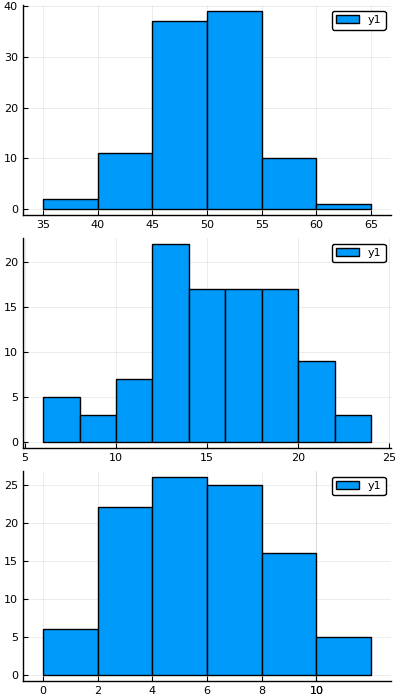

In [34]:
dbin1 = Binomial(100,0.5)
dbin3 = Binomial(100, 0.15)
dbin4 = Binomial(100, 0.05)

x1 = rand(dbin1, 100)
x3 = rand(dbin3, 100)
x4 = rand(dbin4, 100)

println(x1)
println(x3)
println(x4)

p1 = histogram(x1)
p3 = histogram(x3)
p4 = histogram(x4)

plot(p1,p3,p4,layout=@layout([a;b;c]),size=(400,700))

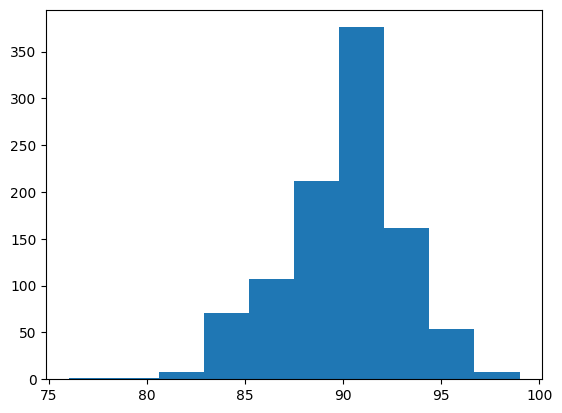

In [7]:
hist(rand(dbin1,1000));

In [25]:
dbin5 = Binomial(1,0.6)
x = rand(dbin5, 100)
println(sum(x))

57
